In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

header_row = ["pattern", "relation", "object", "sent_id", "b1", "e1", "b2", "e2", "sentence"]

data_correct = pd.read_csv("data/pilot/tac2013_C_contexts.dedup", sep = "\t", names=header_row)
data_wrong = pd.read_csv("data/pilot/tac2013_W_contexts.dedup", sep = "\t", names=header_row)

In [2]:
term1 = ["" for x in range(data_correct.shape[0] + data_wrong.shape[0])]
term2 = ["" for x in range(data_correct.shape[0] + data_wrong.shape[0])]

for idx in range(data_correct.shape[0]):
    # tok_sent = re.sub(r'\W+', ' ', data_correct["sentence"][idx]).split(" ")
    tok_sent = data_correct["sentence"][idx].split(" ")
    
    term1[idx] = " ".join(tok_sent[data_correct["b1"][idx] : data_correct["e1"][idx]])
    term2[idx] = " ".join(tok_sent[data_correct["b2"][idx] : data_correct["e2"][idx]])
    
for idx in range(data_wrong.shape[0]):
    # tok_sent = re.sub(r'\W+', ' ', data_correct["sentence"][idx]).split(" ")
    tok_sent = data_wrong["sentence"][idx].split(" ")
    jdx = idx + data_correct.shape[0]
    
    term1[jdx] = " ".join(tok_sent[data_wrong["b1"][idx] : data_wrong["e1"][idx]])
    term2[jdx] = " ".join(tok_sent[data_wrong["b2"][idx] : data_wrong["e2"][idx]])

data_correct["term1"] = term1[0:data_correct.shape[0]]
data_wrong["term1"]   = term1[data_correct.shape[0]:(data_wrong.shape[0] + data_correct.shape[0])]
data_correct["term2"] = term2[0:data_correct.shape[0]]
data_wrong["term2"]   = term2[data_correct.shape[0]:(data_wrong.shape[0] + data_correct.shape[0])]

# data_correct[0:10]

## Frequency of relations in the dataset

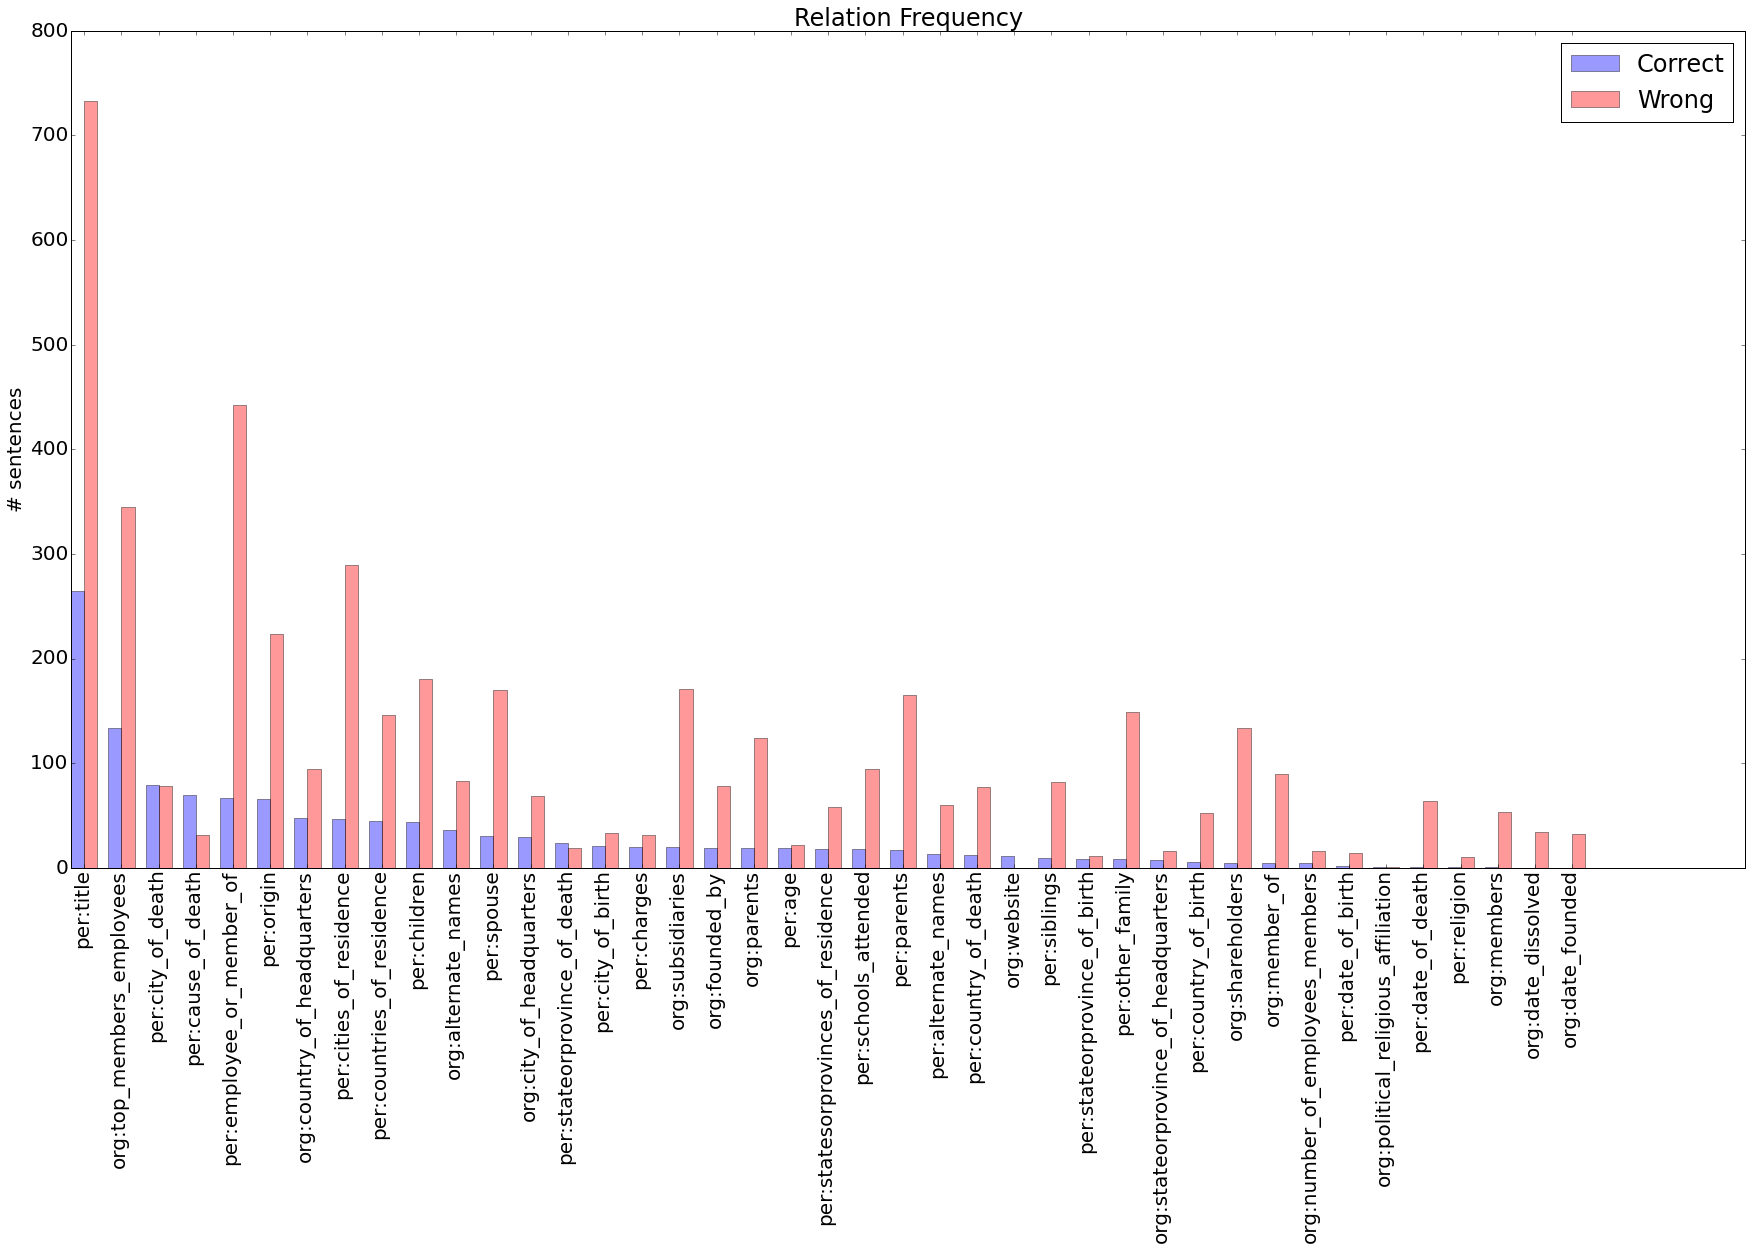

In [21]:
from collections import defaultdict

rel_count_correct = defaultdict(int)
rel_count_wrong = defaultdict(int)

relations = set(data_wrong["relation"]).union(set(data_correct["relation"]))

for relation in relations:
    rel_count_correct[relation] = 0
    rel_count_wrong[relation] = 0

for relation in data_correct["relation"]:
    rel_count_correct[relation] += 1

for relation in data_wrong["relation"]:
    rel_count_wrong[relation] += 1

# print rel_count_correct
# print rel_count_wrong

rel_freq = pd.DataFrame(rel_count_correct.keys(), index = range(0, len(relations)), columns = ["relation"])
rel_freq["correct"] = rel_count_correct.values()
rel_freq["wrong"] = rel_count_wrong.values()
rel_freq = rel_freq.sort(["correct"], ascending = 0).reset_index(drop = True)

## plot fig

n_groups = len(relations)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = 30, 15
plt.rcParams.update({'font.size': 20})

index = np.arange(0, n_groups * 2, 2)
bar_width = 0.7

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, rel_freq["correct"], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Correct')

rects2 = plt.bar(index + bar_width, rel_freq["wrong"], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Wrong')

plt.ylabel('# sentences')
plt.title('Relation Frequency')
plt.xticks(index + bar_width, rel_freq["relation"], rotation = "vertical")
plt.legend(loc = 1)

# plt.tight_layout()
plt.show()


In [22]:
rel_freq.sort(["correct"], ascending = 0)

,relation,correct,wrong
0,per:title,265,733
1,org:top_members_employees,134,345
2,per:city_of_death,79,78
3,per:cause_of_death,70,31
4,per:employee_or_member_of,67,442
5,per:origin,66,223
6,org:country_of_headquarters,48,94
7,per:cities_of_residence,47,289
8,per:countries_of_residence,45,146
9,per:children,44,180


## Term frequency

In [8]:
terms_correct = set(data_correct["term1"]).union(set(data_correct["term2"]))
terms_wrong = set(data_wrong["term1"]).union(set(data_wrong["term2"]))
terms = terms_correct.union(terms_wrong)

all_data = pd.concat([data_correct, data_wrong])
all_data_unique = all_data.drop_duplicates(subset=['term1', 'term2', 'sentence'], take_last=True)

terms_dict = defaultdict(int)

for word in all_data["term1"]:
    terms_dict[word] += 1
for word in all_data["term2"]:
    terms_dict[word] += 1

terms_freq = pd.DataFrame(terms_dict.values(), index = terms_dict.keys(), columns = ["freq"])
terms_freq = terms_freq.sort(["freq"], ascending = 0)

print "Top 20 Terms Based On Frequency"
terms_freq[0:20]

Top 20 Terms Based On Frequency


,freq
Dunne,176
Arcandor,171
Haig,145
Rana,135
Pekar,106
Cunningham,104
Maria Kaczynska,100
China Banking Regulatory Commission,99
Hewitt,99
Mays,92


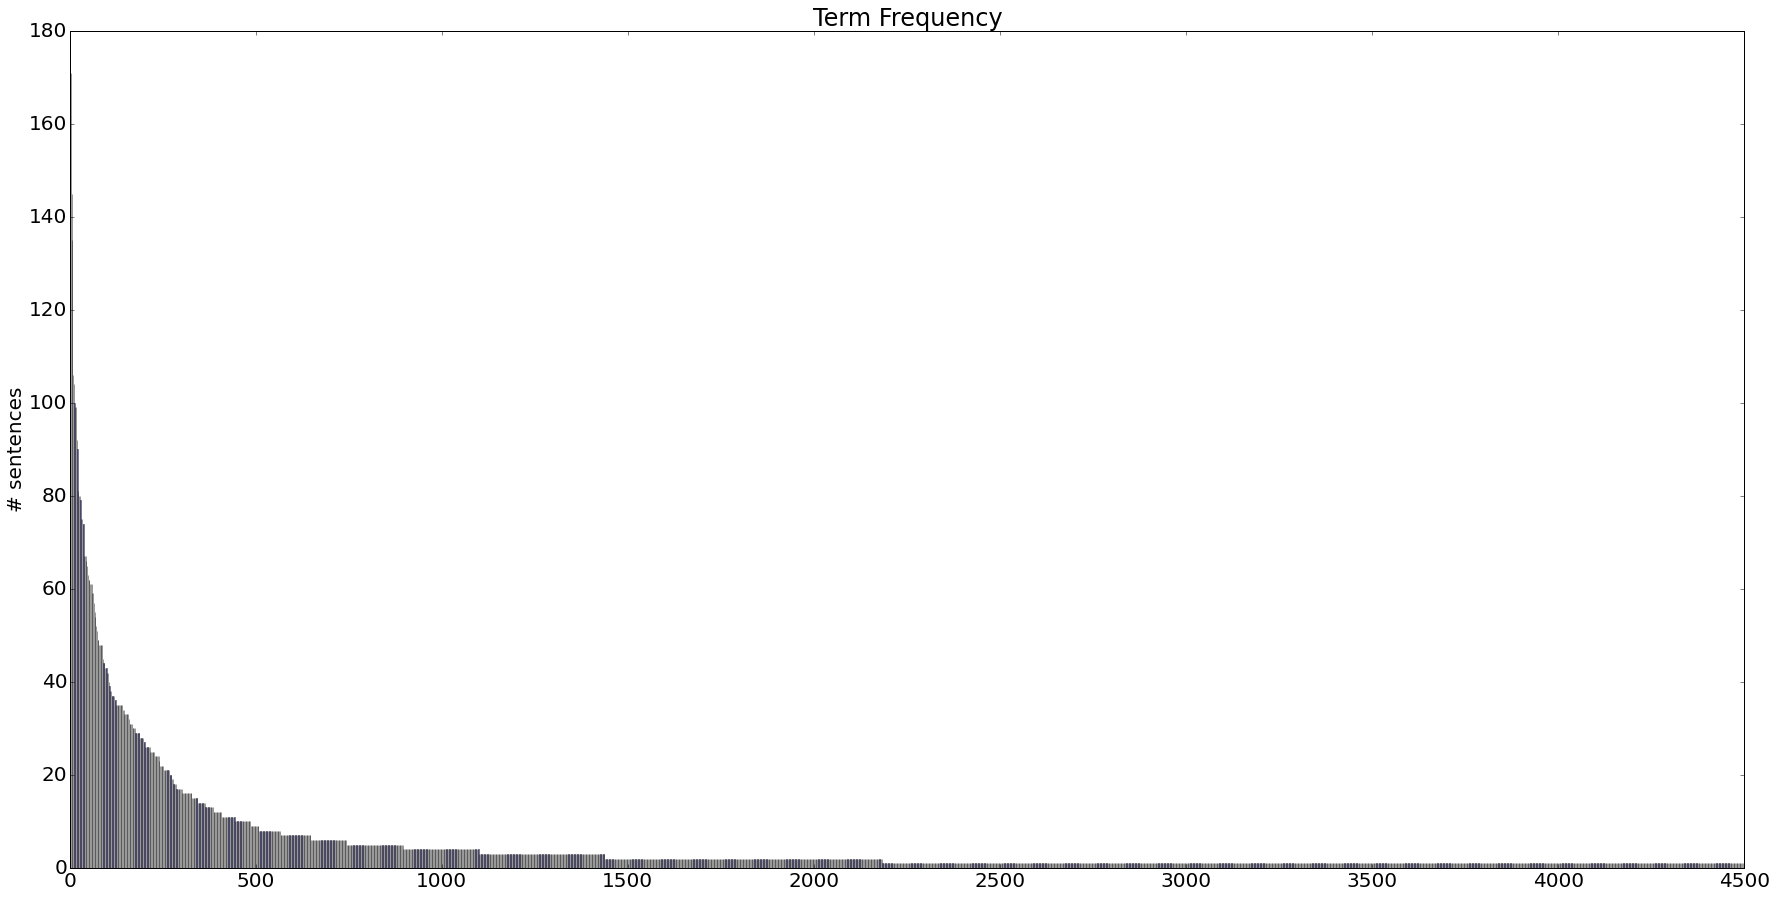

In [7]:
n_groups = len(terms_freq["freq"])

fig, ax = plt.subplots()
#plt.rcParams["figure.figsize"] = 30, 15
#plt.rcParams.update({'font.size': 20})

index = np.arange(0, n_groups * 2, 2)
bar_width = 0.3

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects = plt.bar(index, terms_freq["freq"], bar_width,
                 alpha=opacity,
                 color='b')

plt.ylabel('# sentences')
plt.title('Term Frequency')

plt.show()